## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Loan = pd.read_csv("/content/drive/MyDrive/COURSE/machine learning/projects/Personal Loan Campaign/Loan_Modelling.csv")

In [6]:
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
data.shape

(5000, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
data=data.drop(['ID'],axis=1)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [13]:
# starting univariate analysis

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [14]:
# creating labeled boxplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

loan acceptance does not strongly vary by age alone


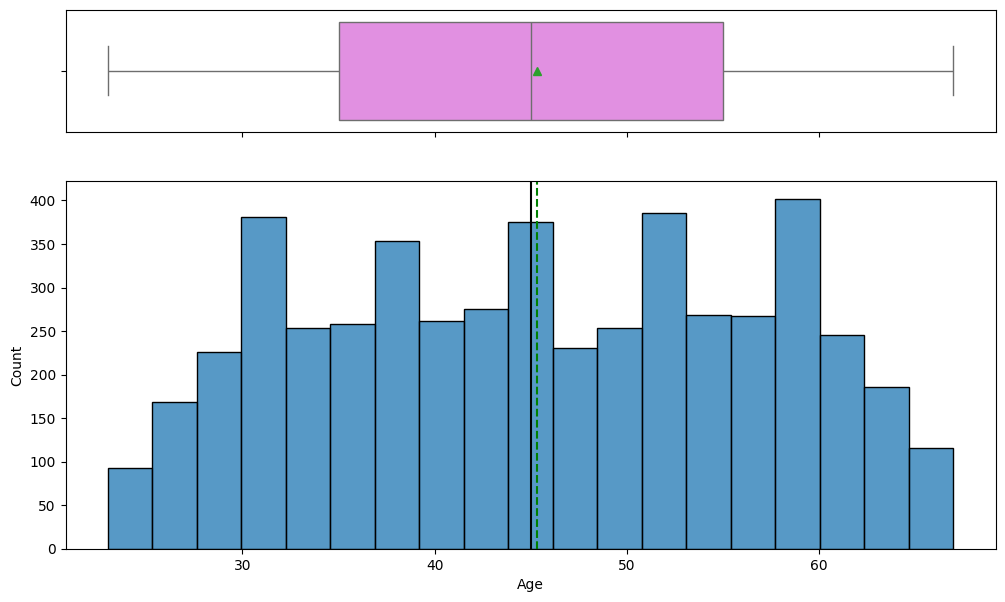

In [94]:
histogram_boxplot(data,"Age")

loan acceptance does not strongly vary by age alone

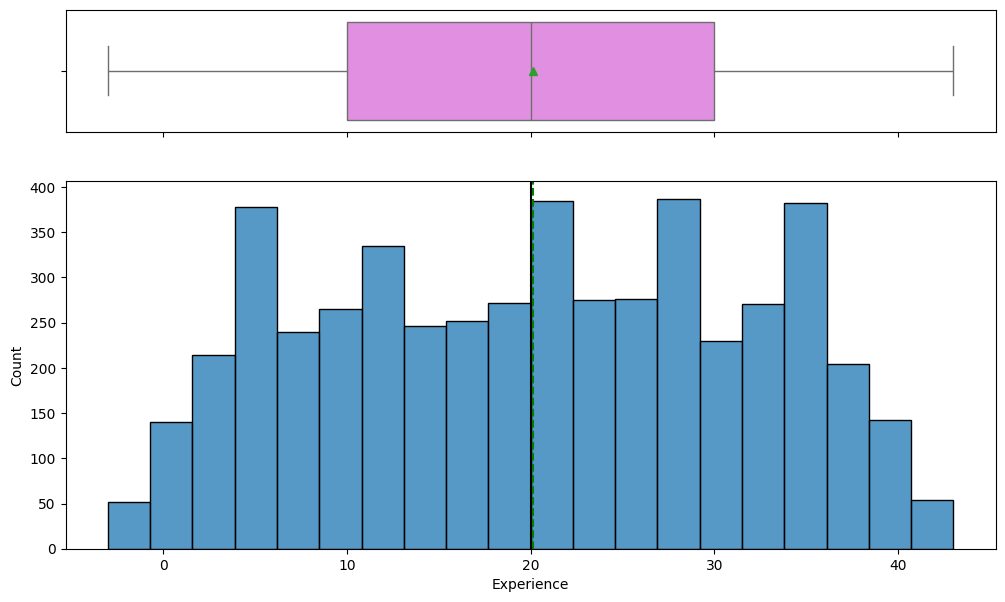

In [16]:
histogram_boxplot(data,'Experience')

similar shape to Age; weak marginal separation vs target

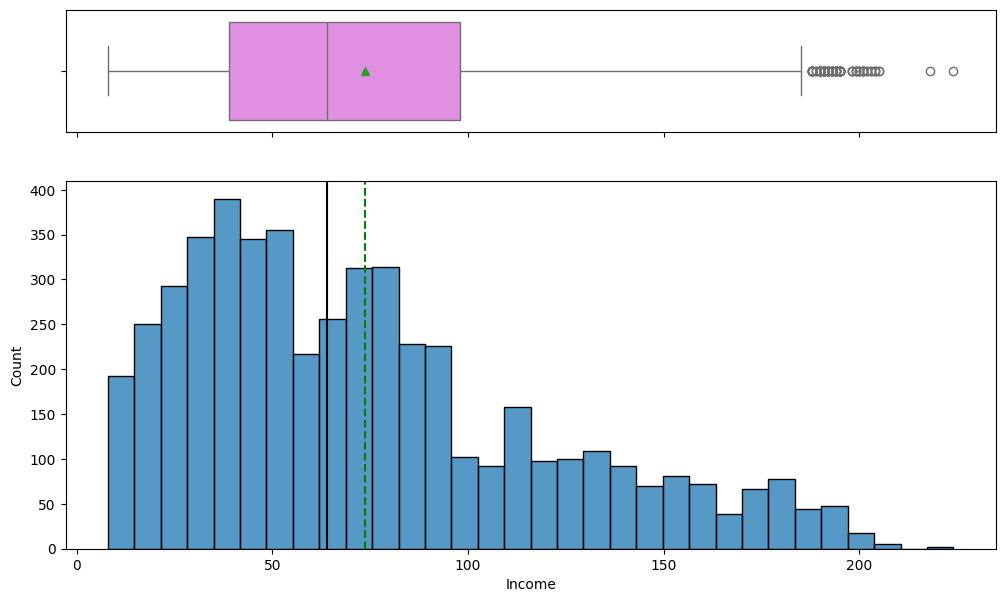

In [17]:
histogram_boxplot(data,'Income')

higher income customers show higher loan acceptance

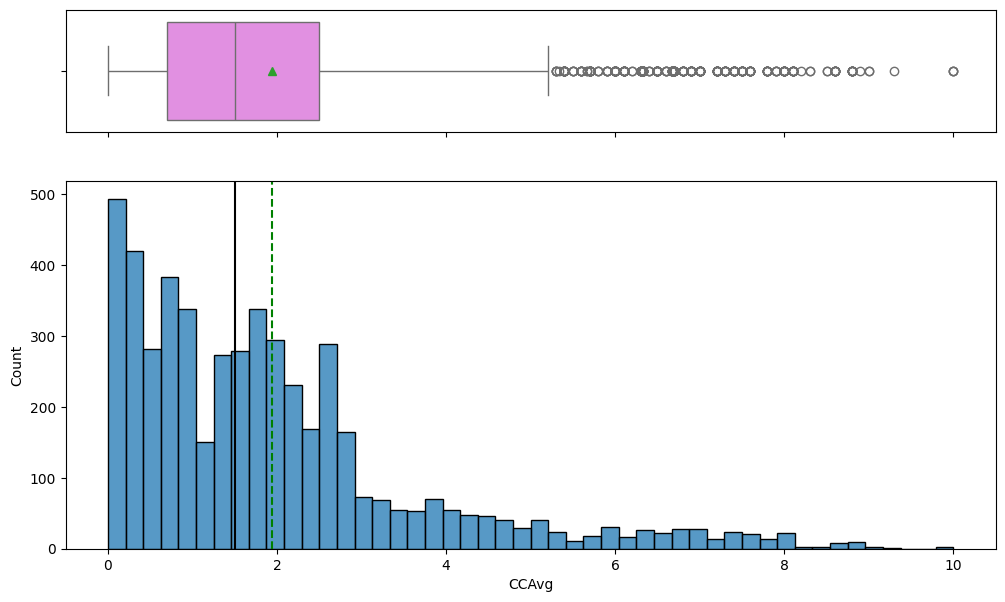

In [18]:
histogram_boxplot(data,'CCAvg')

higher spenders are more responsive to loans

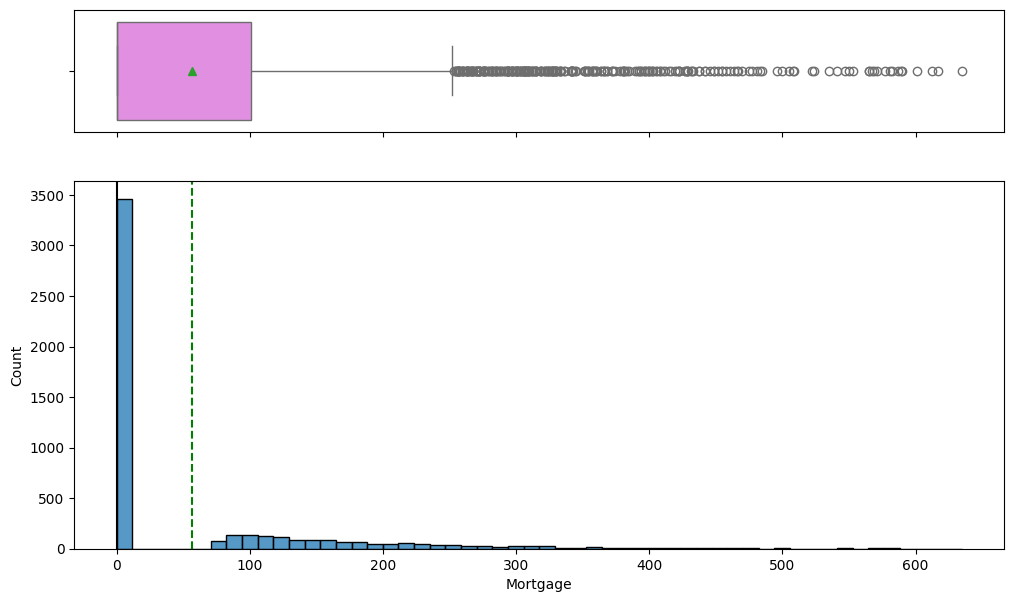

In [19]:
histogram_boxplot(data,'Mortgage')

limited direct impact vs target in isolation

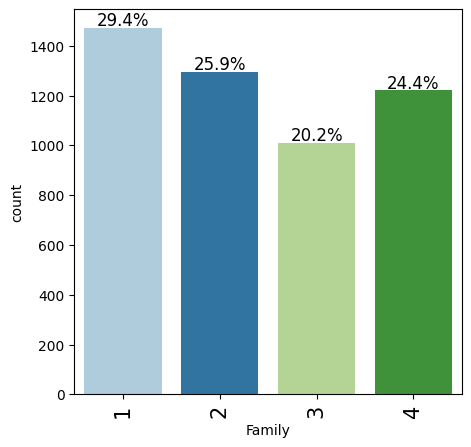

In [20]:
labeled_barplot(data, "Family", perc=True)

Smaller families show slightly higher response

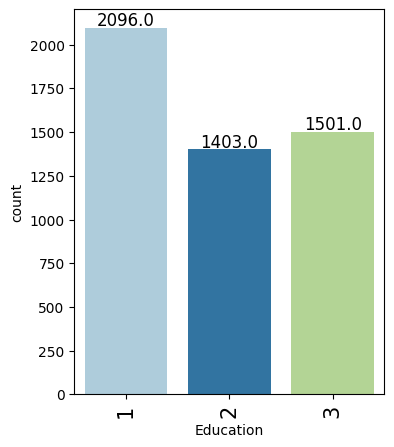

In [21]:
labeled_barplot(data,'Education')

Graduate/Professional segments accept more loans than undergraduates

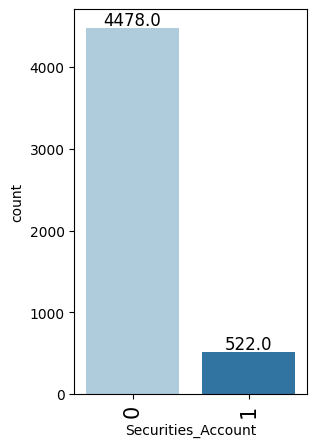

In [22]:
labeled_barplot(data,'Securities_Account')

Ownership correlates with higher uptake

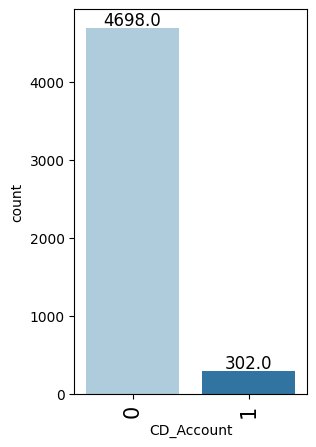

In [23]:
labeled_barplot(data,'CD_Account')

Similar positive association

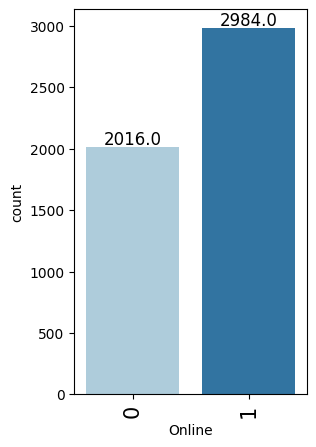

In [24]:
labeled_barplot(data,'Online')

Online users are more engaged

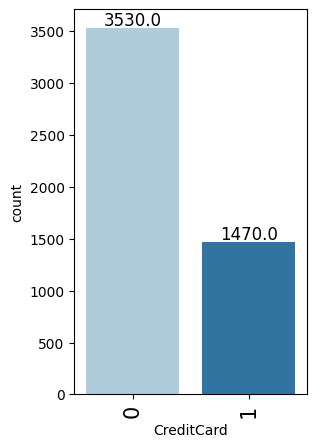

In [25]:
labeled_barplot(data,'CreditCard')

Bank CC holders respond better

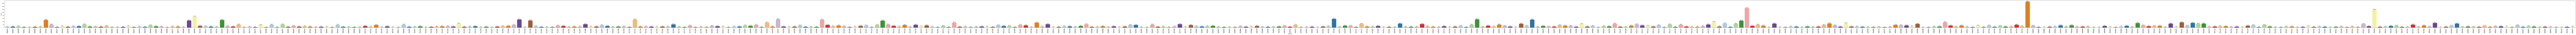

In [26]:
labeled_barplot(data,'ZIPCode')

Geographic effects exist but are secondary to income/spend

In [27]:
# starting bivariate analysis

def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
# plot distribution wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

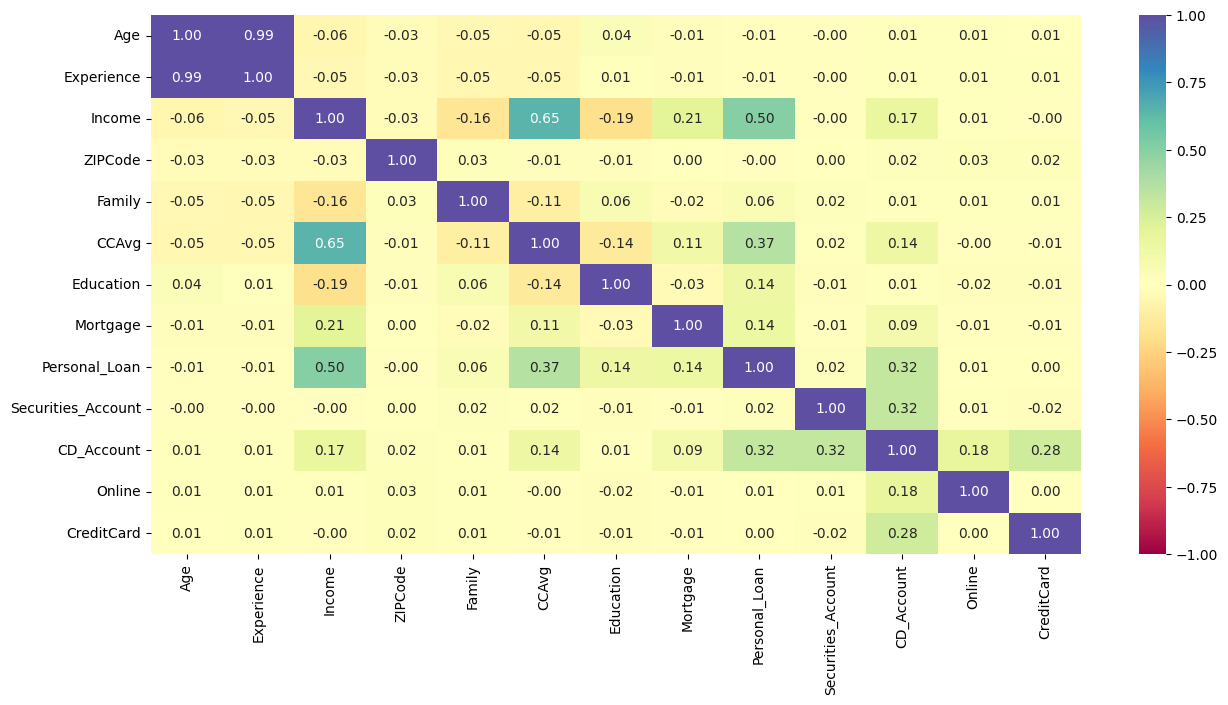

In [29]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


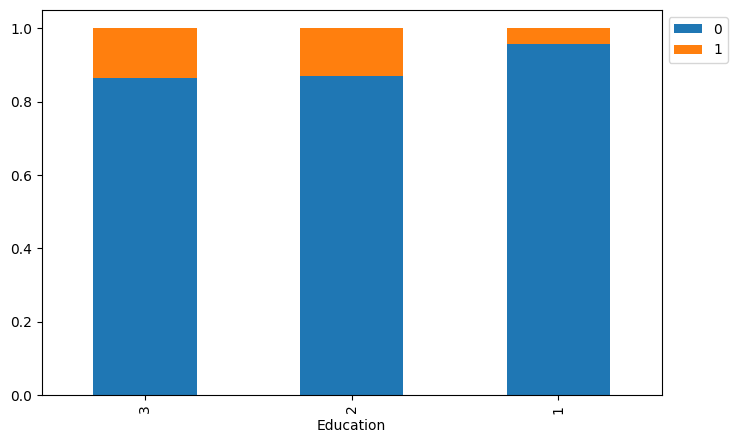

In [30]:
stacked_barplot(data, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


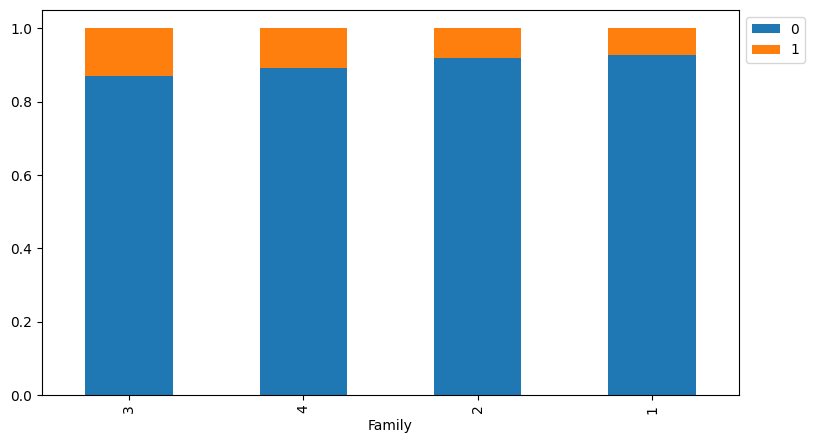

In [31]:
stacked_barplot(data, "Family", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


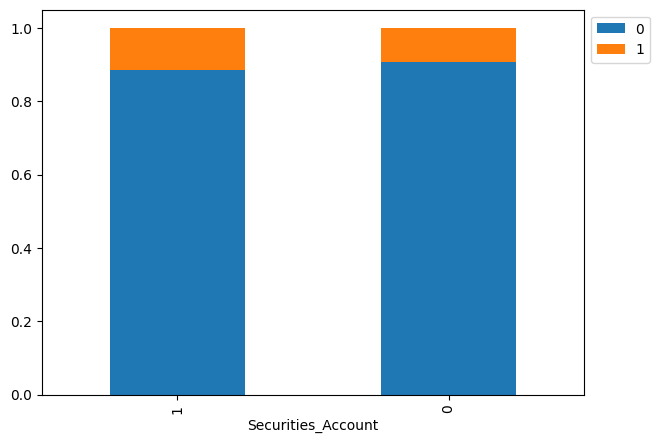

In [32]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


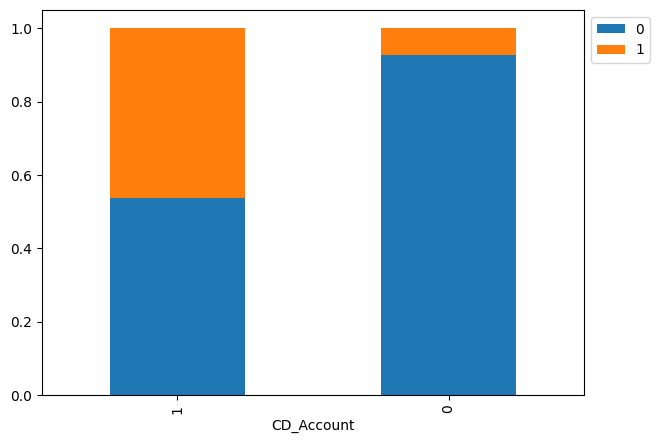

In [33]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


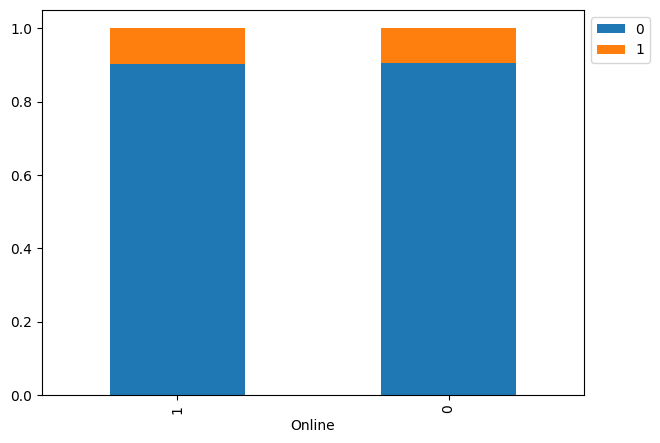

In [34]:
stacked_barplot(data, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


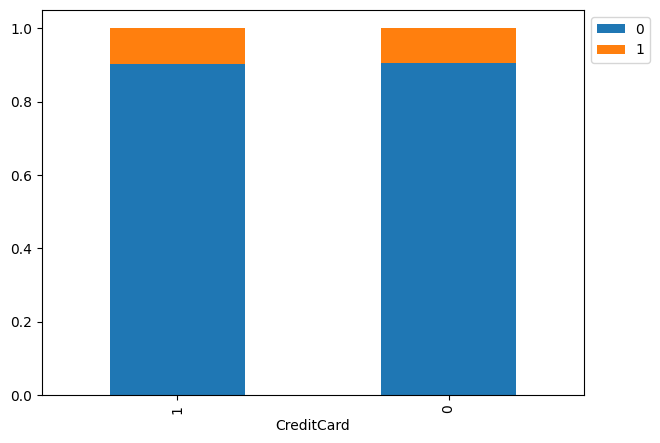

In [35]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
94304            37    8    45
...             ...  ...   ...
96064             5    0     5
96001             9    0     9
95842             2    0     2
90018             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


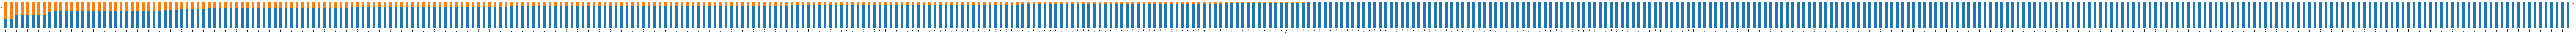

In [36]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

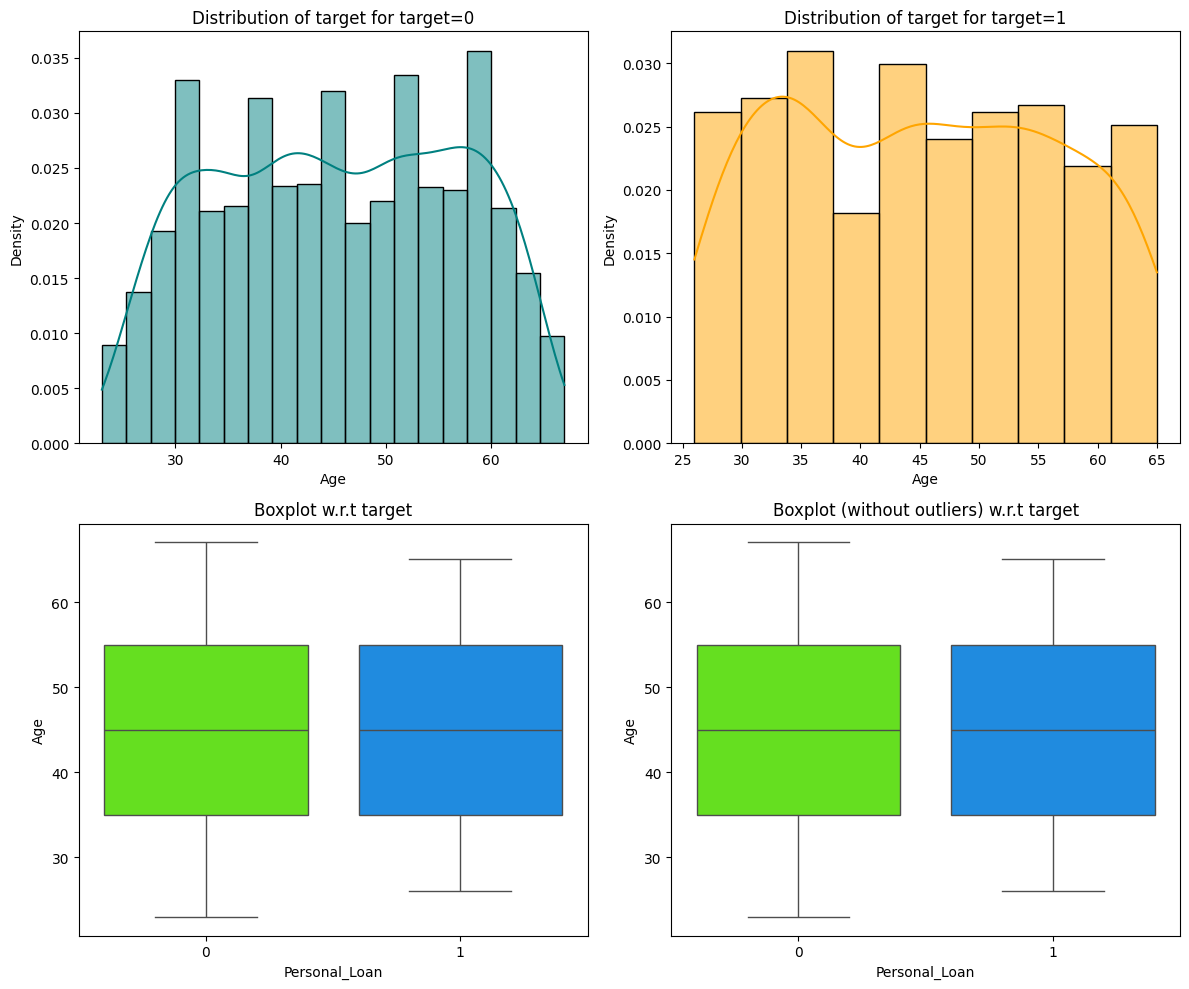

In [37]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

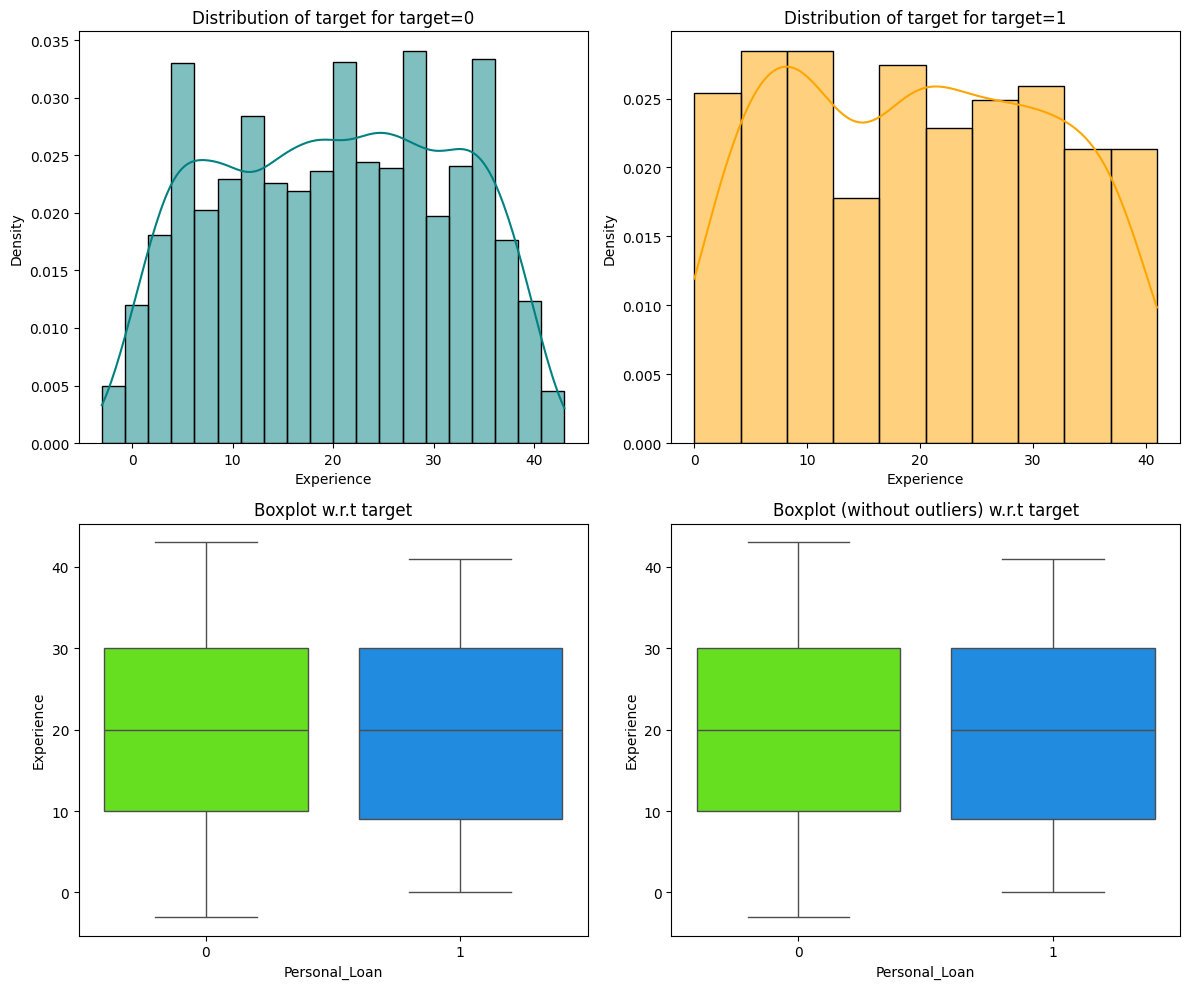

In [38]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

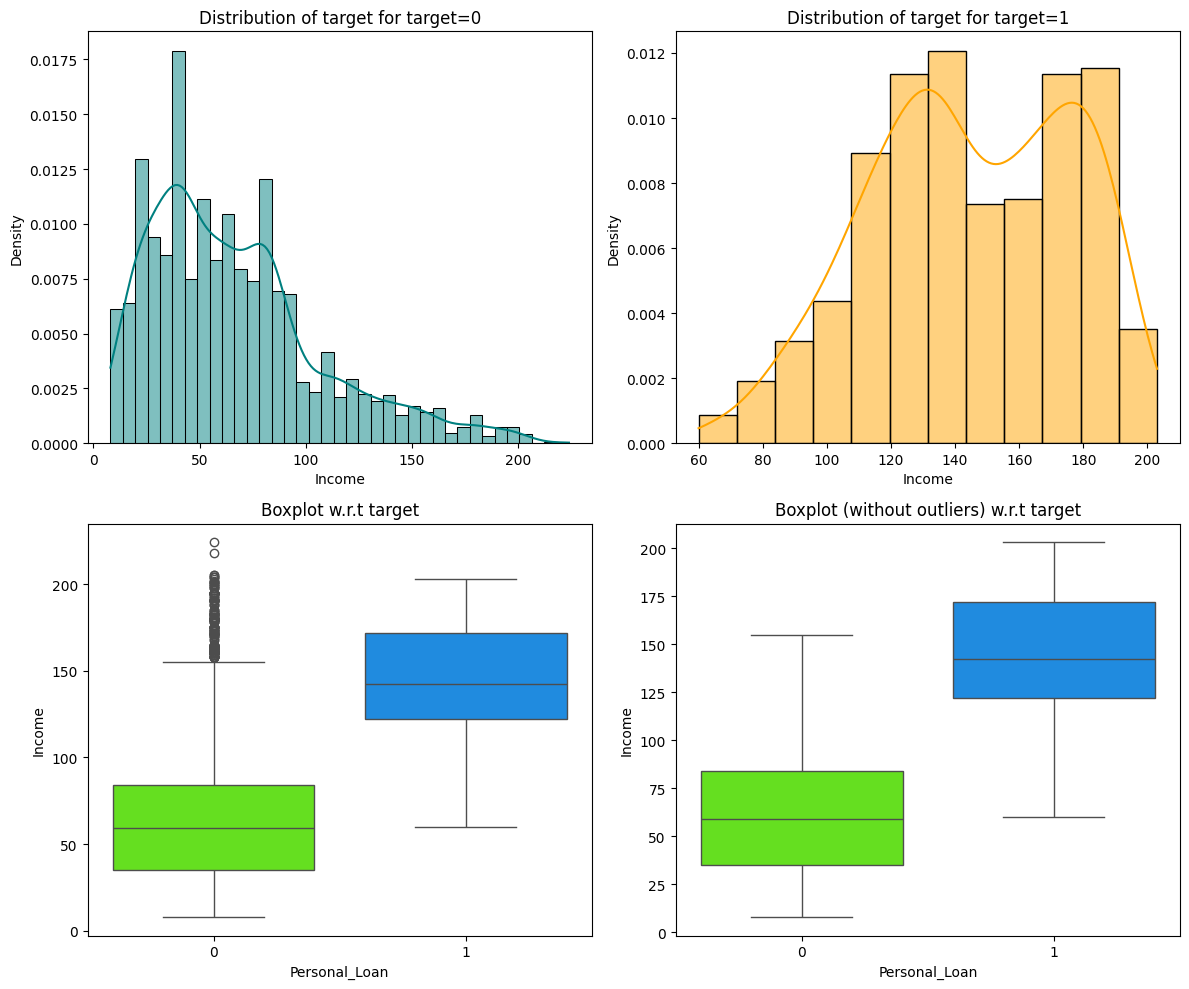

In [39]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

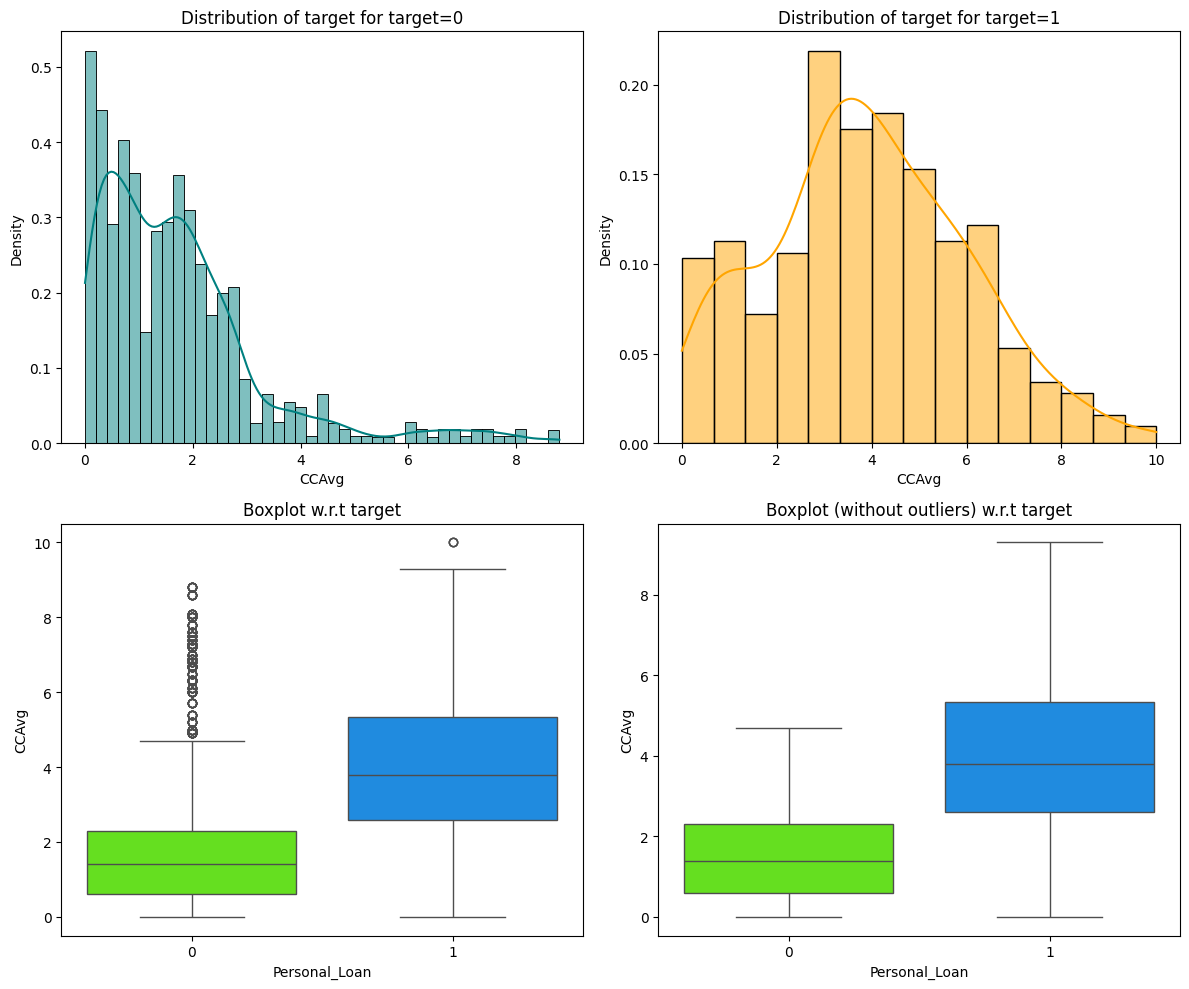

In [40]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [41]:
data.isna().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


In [42]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [43]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [44]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [45]:
data["Education"].unique()

array([1, 2, 3])

In [46]:
data["ZIPCode"].nunique()

467

In [47]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [48]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [49]:
# outlier detection
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1

lower = (
    Q1 - 1.5 * IQR
)
upper = Q3 + 1.5 * IQR # all values outside these bounds are outliers

We keep outliers (Income, CCAvg) because they represent genuine high-value customers.


In [50]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


In [51]:
# dropping Experience since it correlates with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# splitting into two sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* Recall measures how many actual loan-accepting customers were correctly identified. High recall ensures we don’t miss too many potential loan buyers.  
* Precision ensures that when we predict someone will take a loan, they actually are likely to, minimizing wasted marketing effort.  
* F1-Score balances precision and recall, useful if both false negatives and false positives are costly.  


### Model Building

In [53]:
# computing metrics to check performance of classification sklearn model
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [55]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

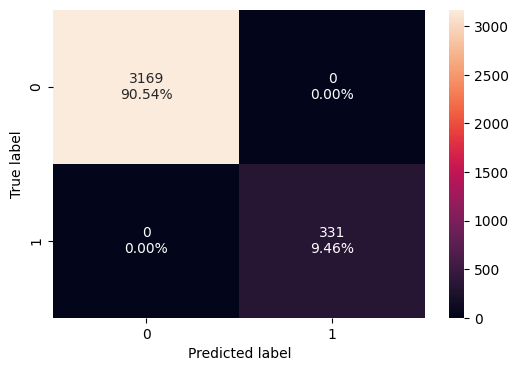

In [56]:
confusion_matrix_sklearn(model, X_train, y_train)

Shows high Recall on training data but lower Recall on test data, indicating overfitting so pruning is required.


In [57]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [58]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


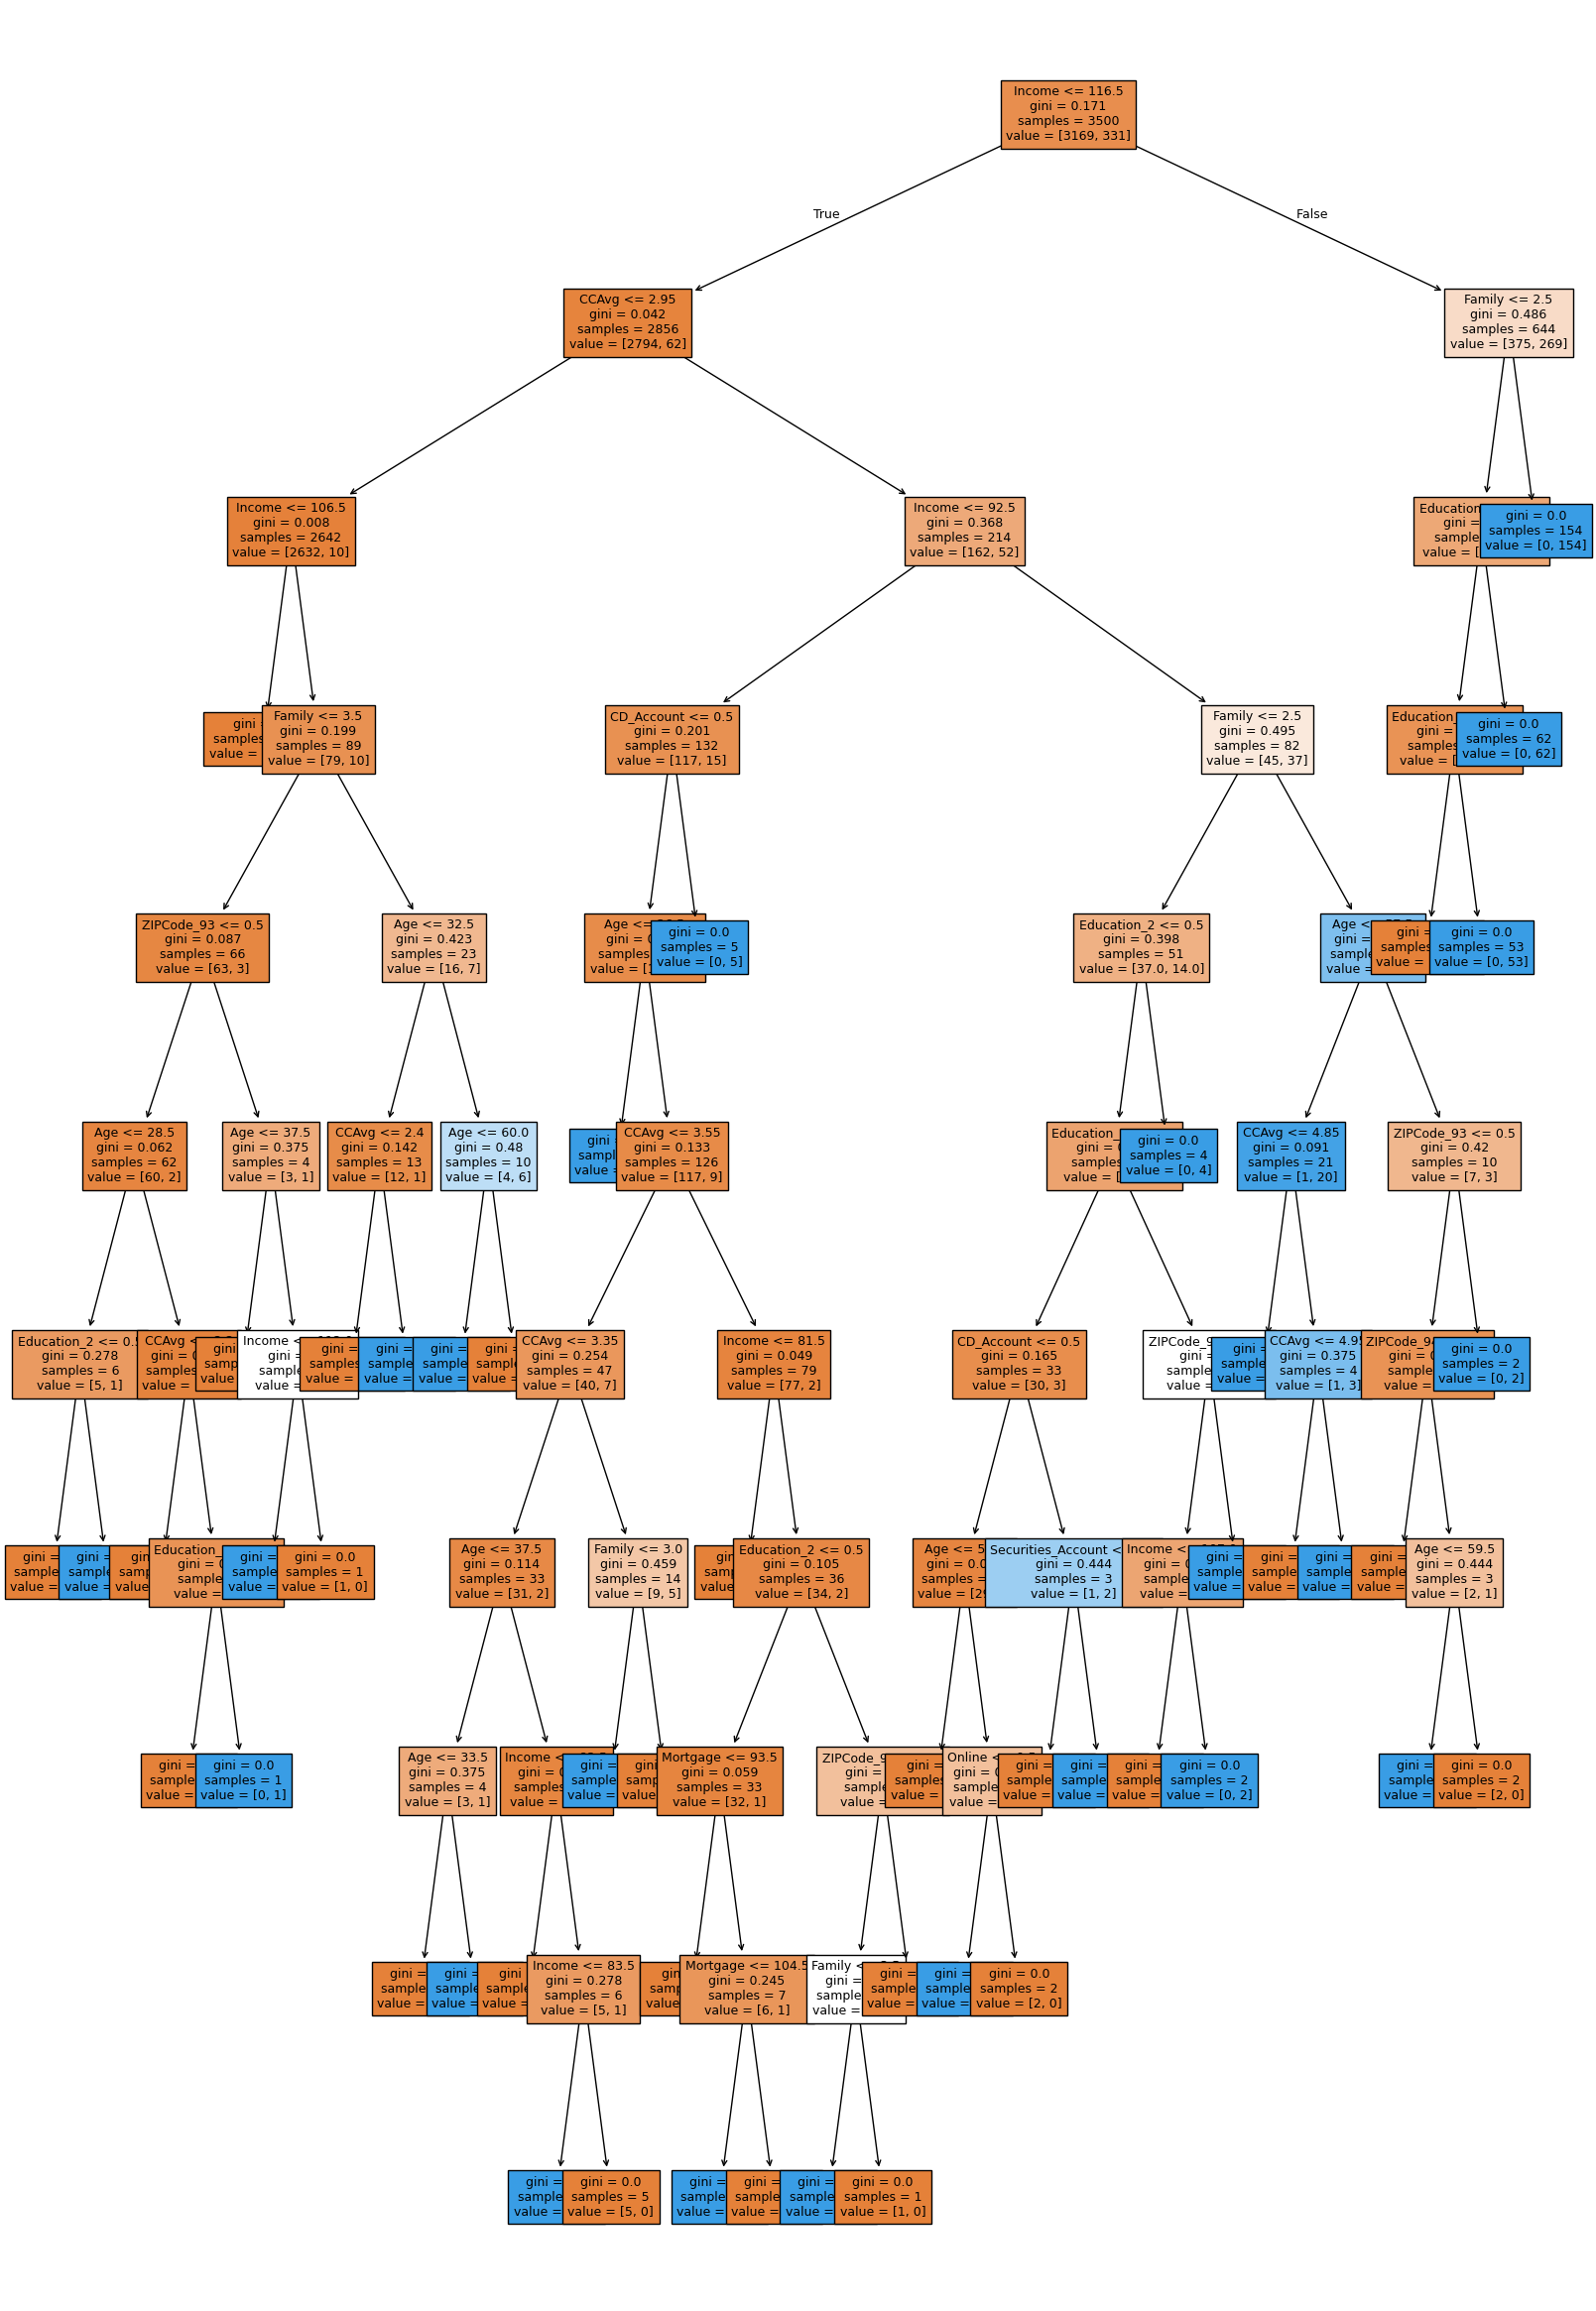

In [59]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [60]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [61]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Securities_Account  0.002224
Online              0.002224
ZIPCode_91          0.000556
CreditCard          0.000000
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


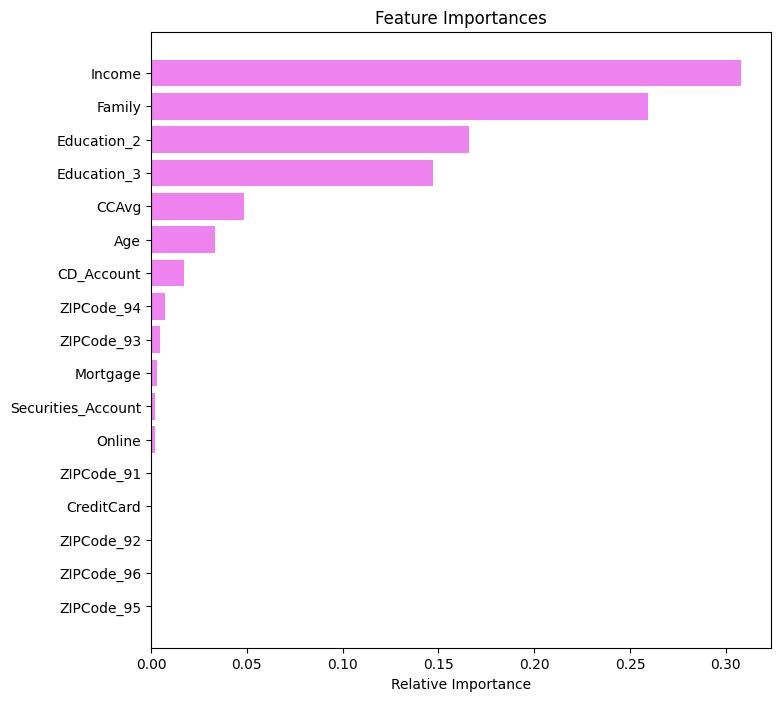

In [62]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

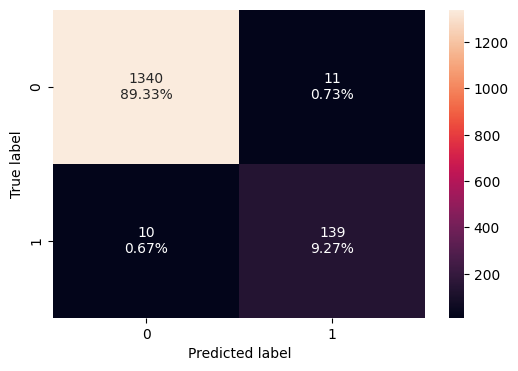

In [63]:
confusion_matrix_sklearn(model, X_test, y_test)

In [64]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Improvement

In [65]:
# defining tree parameters to loop through
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            estimator.fit(X_train, y_train)

            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            score_diff = abs(train_recall_score - test_recall_score)

            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [66]:
# fit best algorithm
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

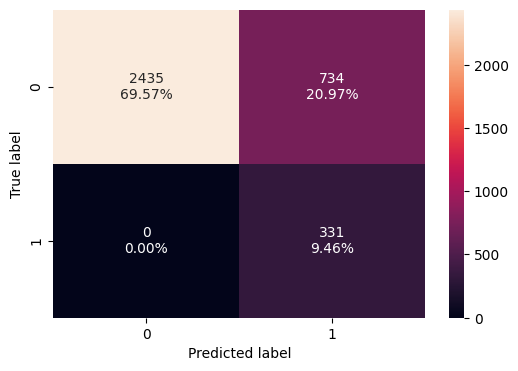

In [67]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [68]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


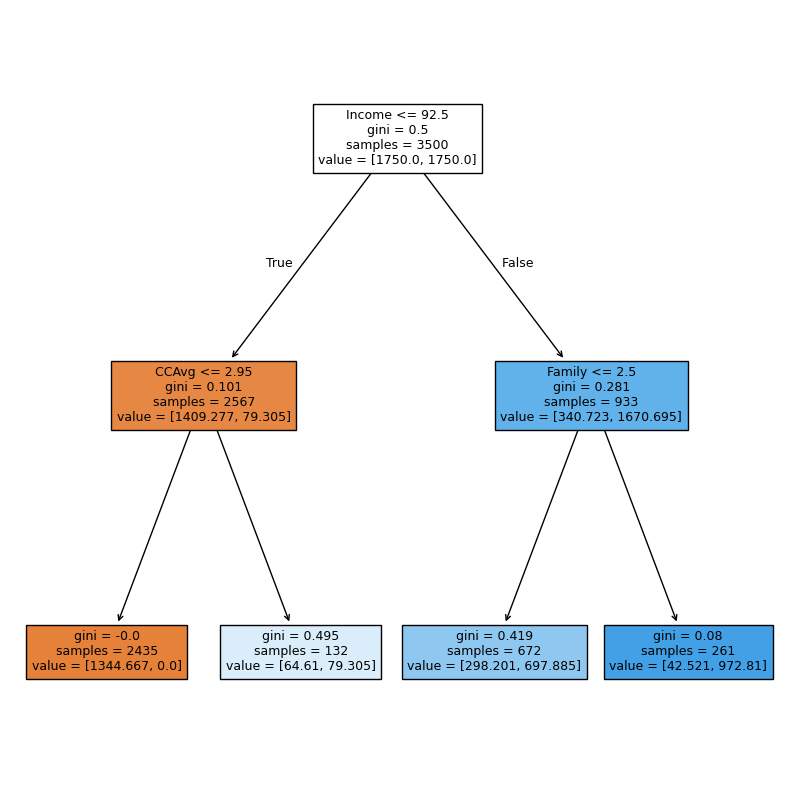

In [69]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [70]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [71]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Education_2         0.000000
Education_3         0.000000


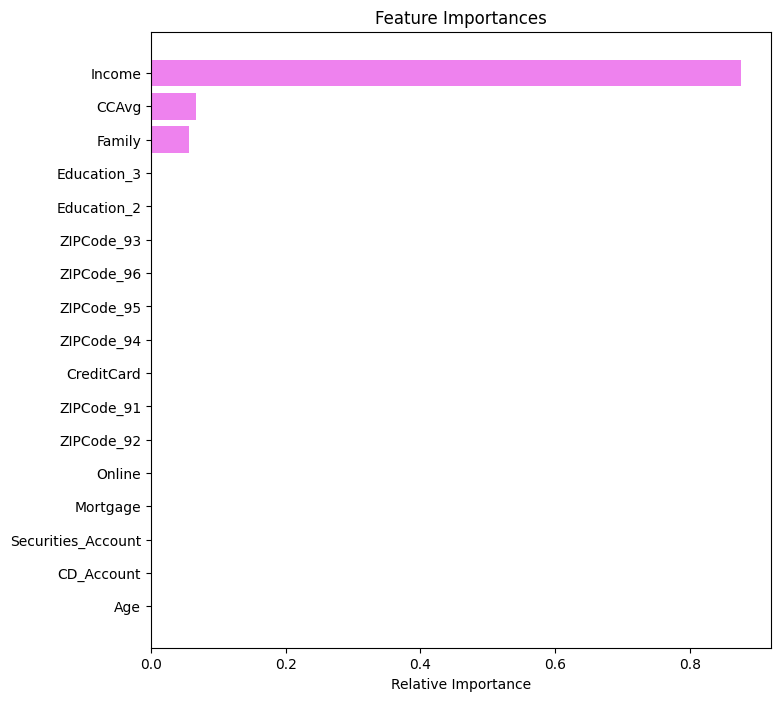

In [72]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

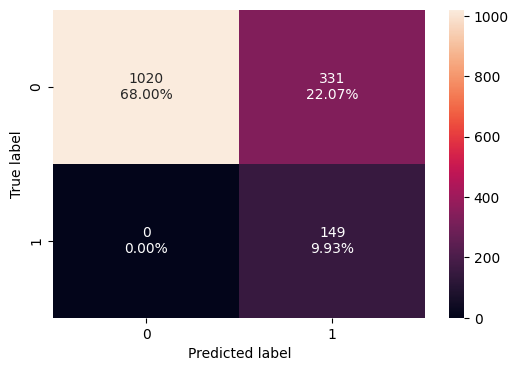

In [73]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [74]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


In [75]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [76]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


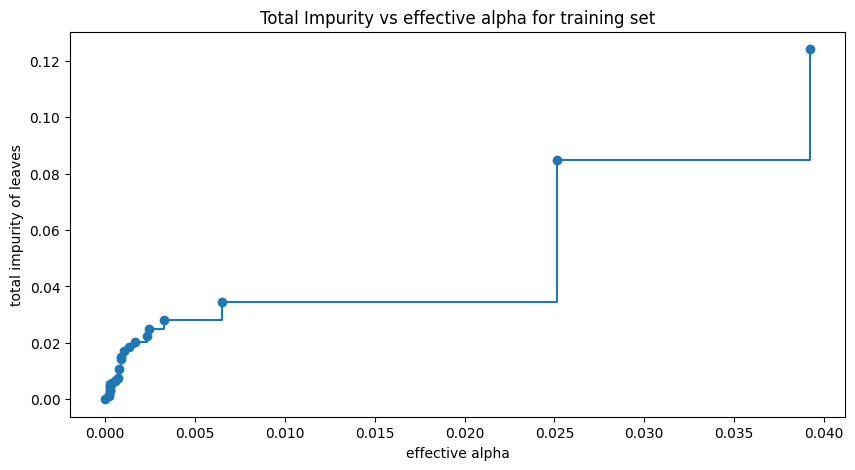

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [78]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


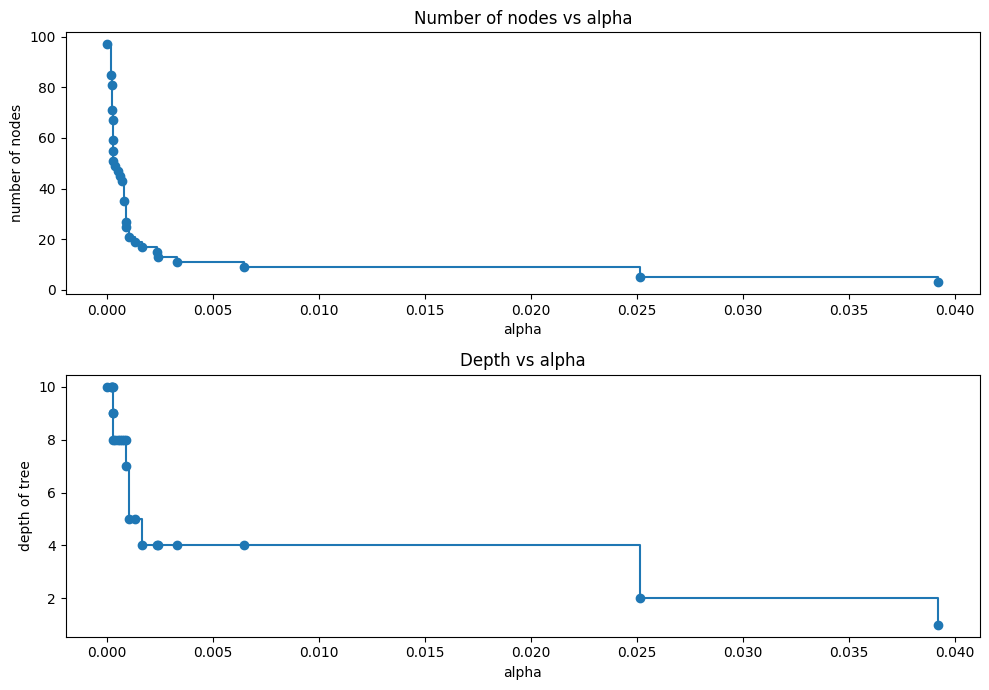

In [79]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [80]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

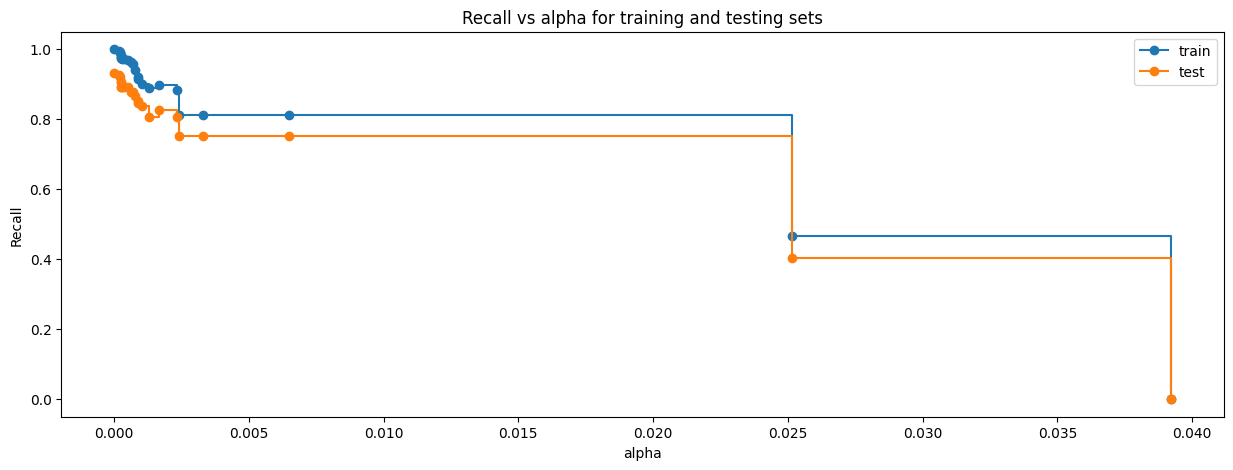

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [82]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [83]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[index_best_model], class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0),
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

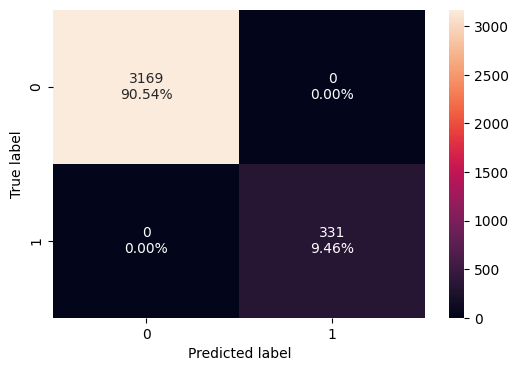

In [84]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [85]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


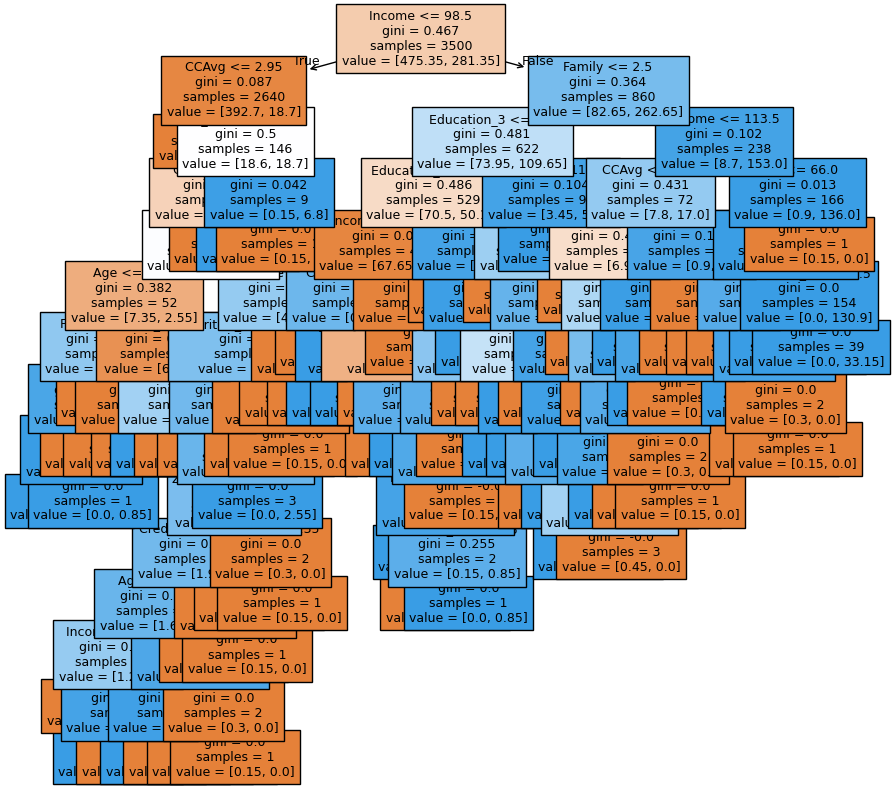

In [86]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [87]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Income <= 75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Income >  75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 

In [88]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.597264
Education_2         0.138351
CCAvg               0.078877
Education_3         0.067293
Family              0.066244
Age                 0.018973
CD_Account          0.011000
Mortgage            0.005762
Securities_Account  0.004716
ZIPCode_94          0.004702
ZIPCode_91          0.003587
CreditCard          0.002428
ZIPCode_92          0.000802
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


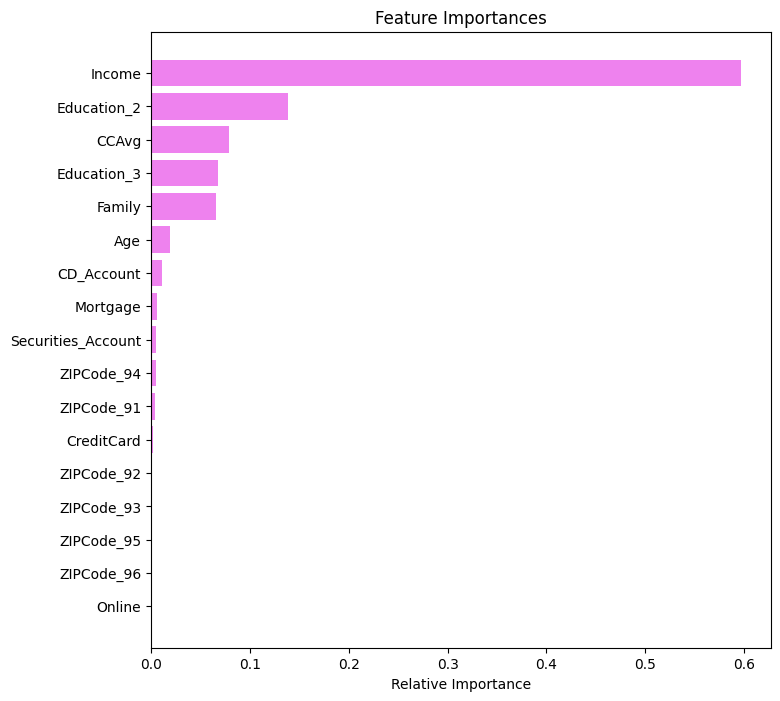

In [89]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [90]:
(estimator_2, X_test, y_test)

(DecisionTreeClassifier(ccp_alpha=np.float64(0.0),
                        class_weight={0: 0.15, 1: 0.85}, random_state=1),
        Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  \
 2764  31.0    84.0     1.0   2.90     105.0                 0.0         0.0   
 4767  35.0    45.0     3.0   0.90     101.0                 1.0         0.0   
 3814  34.0    35.0     3.0   1.30       0.0                 0.0         0.0   
 3499  49.0   114.0     1.0   0.30     286.0                 0.0         0.0   
 2735  36.0    70.0     3.0   2.60     165.0                 0.0         0.0   
 ...    ...     ...     ...    ...       ...                 ...         ...   
 4140  63.0    32.0     1.0   1.50       0.0                 0.0         0.0   
 3969  38.0    75.0     3.0   2.33       0.0                 0.0         0.0   
 2535  50.0    21.0     2.0   0.70     129.0                 0.0         0.0   
 1361  50.0    38.0     4.0   0.90       0.0                 0.0         0.

In [91]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.852349,0.933824,0.891228


## Model Performance Comparison and Final Model Selection

In [92]:
# training performance comparision
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,1.0
Recall,1.0,1.000000,1.0
Precision,1.0,0.310798,1.0
F1,1.0,0.474212,1.0


In [93]:
# testing performance comparision
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.979333
Recall,0.932886,1.000000,0.852349
Precision,0.926667,0.310417,0.933824
F1,0.929766,0.473768,0.891228


Final Selection: The pruned Decision Tree is chosen because it achieves the highest Recall on the test set with acceptable Precision, making it the most effective model for identifying potential loan customers.


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?
- Focus on high-income, high-credit card spending, and well-educated customers since they are most likely to take loans
- Leverage cross-selling by offering loans to customers who already have CD accounts, securities accounts, or use online banking
- Run digital-first campaigns (emails, app notifications) since online users show higher engagement
- For lower-income or undergraduate customers, introduce smaller starter loans or financial education programs to build trust
- Use a recall-focused model to capture more potential loan buyers but monitor precision with tiered marketing (email first, calls later) to control costs


___